# Initial steps towards end of selecting sink and source Nodes

In [1]:
import cv2
from imagetoolbox import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

import numpy as np
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


# %matplotlib nbagg
%matplotlib inline

IMG_SRC = "./images/unnamed.jpg"

img = cv2.imread(IMG_SRC, 0)
img.shape

(341, 512)

## 1. Get initial contour

### set initial countour as skimage's approximate contour (a quick hack)

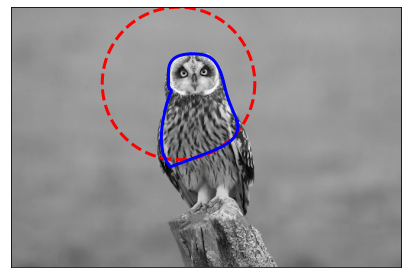

In [2]:
s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

In [3]:
init_c_x, init_c_y = snake[:, 0], snake[:, 1]
init_c_y.shape

(400,)

## 2. dilate current contour

In [4]:
contour_img = np.zeros(img.shape)
int_snake = [[int(e[0]), int(e[1])] for e in snake] 
for x, y in int_snake:
    contour_img[x, y] = 255

(341, 512)

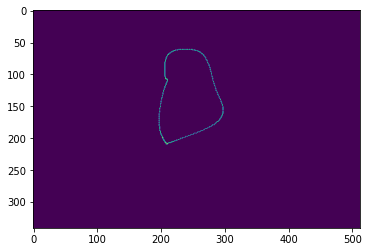

In [5]:
plt.imshow(contour_img)
contour_img.shape

(341, 512)

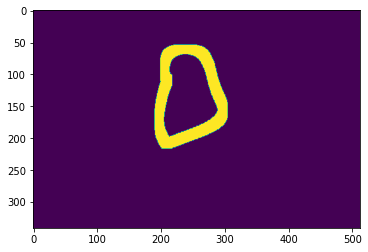

In [96]:
# kernel = np.ones((5,5),np.uint8)
kernel = np.ones((15,15),np.uint8)
dilation = cv2.dilate(contour_img, kernel,iterations = 1)

plt.imshow(dilation)
dilation.shape

In [50]:
np.unique(dilation)

array([  0, 255], dtype=uint8)

## 3. selecting inner & outter countours as sink and source node pixels

Number of Contours is: 2


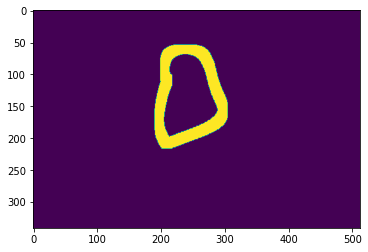

In [6]:
# kernel = np.ones((5,5),np.uint8)
kernel = np.ones((15,15),np.uint8)
dilation = cv2.dilate(contour_img, kernel,iterations = 1)

plt.imshow(dilation)
dilation.shape

dilation = dilation.astype(np.uint8)

# Find edges
edges = cv2.Canny(dilation, 10, 100)
# edges = cv2.Canny(dilation, 100, 200)
# Find Contours
# contours, hierarchy = cv2.findContours(edges,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# ret, thresh = cv2.threshold(dilation, 127, 255, 0)
ret, thresh = cv2.threshold(dilation, 20, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find Number of contours
print("Number of Contours is: " + str(len(contours)))

plt.imshow(dilation)

### draw outter contour - as pixels set to 255

(341, 512)

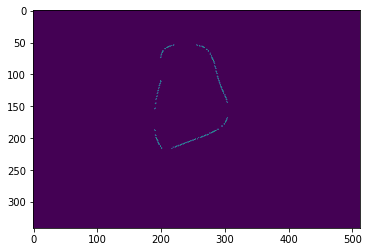

In [7]:
tmp_img = np.zeros(img.shape)

for e in contours[0]:
    tmp_img[e[0][1], e[0][0]] = 255
    
plt.imshow(tmp_img)
tmp_img.shape

### draw inner contour - as pixels set to 255

(341, 512)

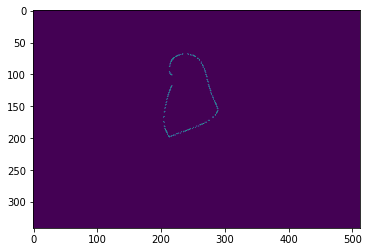

In [8]:
tmp_img = np.zeros(img.shape)

for e in contours[1]:
    tmp_img[e[0][1], e[0][0]] = 255
    
plt.imshow(tmp_img)
tmp_img.shape

# Pseudo Code for Complete Min-Cut Algorithm

In [ ]:
(1) set i=0 # set initial index

(2) c_{i} = skimage.segmentation.active_contour(image, circle_line) 
    # use default active_contour library to guess & set the initial contour. Use a circle line as initial seed
    # and give image as the arguments for the function
    # c_{i} contains pixel coordinates as a list of list [[x1, y1], [x2, y2], ...]

    dilated_c_{i} = cv2.dilate(c_{i}, kernel)
    # dilate the intial countour c_{i} using a kernel with enough width
    
    # select inner and outter contours
    (a) c_{i}_thresholded = cv2.threshold(dilated_c_{i}, 20, 255, 0)
        # apply thresholding over dilated initial contour
        
    (b) contours, hierarchy = cv2.findContours(thresh)
        # find contours using opencv library based on the thresholded output of dilated initial contour
        # contours will have list of contour, each with list of x, y coordinates
    
    (c) inner_contour (IC_i), outter_contour (OC_i) = contours[0], contours[1]
        inner_contour_x, inner_contour_y = inner_contour[0][1]
        outter_contour_x, outter_contour_y = outter_contour[0][1]
        # set inner & outter contours with their x & y pixel coordinates
        
(3) class vertice(): 
        def __init__(self, x, y): 
            self.x = x
            self.y = y
    # define a single vertice python class with x & y instance variables
    
    sink_nodes_list <- [vertice(inner_contour_pixel) for inner_contour_pixel in inner_contour]
    source_nodes_list <- [vertice(outter_contour_pixel) for outter_contour_pixel in outter_contour]
    # assign inner & outter contour pixel coordiates together as sink & source vertices and put them in a list
    # assign contour[0] pixels as sink nodes (sk_v_x, sk_v_y <- inner_contour[i][0], inner_contour[i][1])
    #                                         sk_v_x: sink node's x coordinate
    # assign contour[1] pixels as source nodes (so_v_x, so_v_y <- outter_contour[i][0], outter_contour[i][1])
    #                                           so_v_x: source node's x coordinate
    
(4) 
    (a)
    class ImageG():
        def __init__(self):
            self.vertices = []
            self.edges = {}
            self.sink_vertices = []
            self.source_vertices = []
            
        def add_vertice(self, v):
            self.vertices.append(v)
            
        def add_edge(self, v0, v1, cost):
            self.edges[[v0, v1]] = cost
            
        def add_sink_vertice(self, sink_v):
            self.sink_vertices.append(sink_v)
            
        def add_source_vertice(self, source_v):
            self.source_vertices.append(source_v)
            
    image_G = ImageG()
    # define the image converted to graph in a python class with vertices (list), edges (dict), 
    # sink_vertices (list), and source_vertices (list) as instance variables.
    
    (b) for pix_x, pix_y in image:
            pix_vertice = vertice(pix_x, pix_y)
            image_G.add_vertice(pix_vertice)
        # place all pixels(x, y) in the image graph vertices list
        
    (c) image_grad <- |grad(image)|
        # get image gradient magnitudes for x, y positions
        
    (d) # c(i, j) = (g(i, j) + g(j, i)) ----- [1]
        # where g(i, j) = exp(- grad_ij(i) / max_k(grad_ij(k)) ),
        #                 grad_ij(k): pixel gradient magnitude at location k in the i->j direction
    
        for pix_x, pix_y in image:
            for edge in all_4_connectivit_edges_around_pix_xy:
                cost_ij = calculate_cost_from_equation_1
                
                image_G.add_edge(edge[0], edge[1], cost_ij)
                # for each 4-connectivity edges, add the undirected edge weights to the image_G
                
    # Actual Min-Cut algorithm proposed in the paper
    
    (e) for inner_contour_pix in inner_contour:            
            image_G.vertices.remove(inner_contour_pix)
            # remove inner_contour_pix from the image graph
            
            image_G.add_sink_vertice(inner_contour_pix)
            # add inner_contour_pix as sink vertices
        # removed all sink pixels from image graph
            
        for outter_contour_pix in outter_contour:            
            image_G.vertices.remove(outter_contour_pix)
            # remove outter_contour_pix from the image graph
            
            image_G.add_source_vertice(outter_contour_pix)
            # add outter_contour_pix as sink vertices
        # removed all source pixels from image graph
    
        aggregated_sink_vertice = aggregate_sink_vetices( image_G.sink_vertices )
        aggregated_source_vertice = aggregate_source_vetices( image_G.source_vertices )
        # aggregate the edges that were disconnected when removing inner_contour & outter_contour vertices, 
        # and place them for single source & sink to other connected nodes
        
    (f) min_cut_contour = min_cut_API(image_G)
        # now apply min-cut algorithm iteratively
        
    (g) c_{i+1} <- min_cut_contour
        # find the min-cut vertices and it is our current (newly generated contour): c_{i+1}
    
    
(5) if all([c_{i}_x, c_{i}_y] == [c_{i+1}_x, c_{i+1}_y]):
        break
    # if all pixels from c_{i} and c{i+1} contours match, break the iteration loop
    # else continue to step[2]
